### Machine Learning for Econonomics Journal Abstracts

#### Setting up X and Y train/test datasets and fitting to a logistic regression

In [86]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [98]:
topJourns_df = pd.read_csv("raw_data_econ/topRanks_cleaned.csv", encoding = "'iso-8859-1'")
hiJourns_df = pd.read_csv("raw_data_econ/hiRanks_cleaned.csv", encoding = "'iso-8859-1'")
notHiJourns_df = pd.read_csv("raw_data_econ/notHiRanks_cleaned.csv", encoding = "'iso-8859-1'")
notHiJourns2_df = pd.read_csv("raw_data_econ/notHiRanks2_cleaned.csv", encoding = "'iso-8859-1'")

frames = [topJourns_df, hiJourns_df, notHiJourns_df, notHiJourns2_df]
combined_df = pd.concat(frames)
combined_df.head()

,Unnamed: 0,abstract,top_journal
0,0,We propose local measure relationship paramete...,1
1,1,The labor market increasingly rewards social s...,1
2,2,We develop theory endogenous uncertainty busin...,1
3,3,What shapes optimal degree progressivity tax t...,1
4,4,An increase household debt GDP ratio predicts ...,1


In [88]:
# split data into test & train
X = combined_df["abstract"]
y = combined_df["top_journal"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

# transform X and y to lists for processing
X_train = X_train.tolist()
X_test = X_test.tolist()
y_train = y_train.tolist()
y_test = y_test.tolist()


In [89]:
# Fit to logistic regression function
classifier = LogisticRegression()

'''
TFIDF_vectorizer fit: 
Training Data Score: 0.9782855290876681
Testing Data Score: 0.6676384839650146

from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
X_test_counts = count_vect.transform(X_test)
from sklearn.feature_extraction.text import TfidfTransformer
tf_transformer = TfidfTransformer(use_idf=False).fit(X_train_counts)
'''


#word to vector
hash_vectorizer = HashingVectorizer(analyzer='word', ngram_range=(1, 2))
X_train=hash_vectorizer.transform(X_train)
X_test=hash_vectorizer.transform(X_test)

classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [90]:
# training and testing data score
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.8778413736713001
Testing Data Score: 0.708680725846003


In [93]:
# Making predictions
predictions = classifier.predict_proba(X_test)

# Saving to pandas dataframe
predict_0 = []
predict_1 = []
for entry in predictions:
    predict_0.append(entry[0])
    predict_1.append(entry[1])
predVAct_df = pd.DataFrame({"Predict_0": predict_0, "Predict_1":predict_1, "Actual": y_test})
predVAct_df = predVAct_df.sort_values(by=["Actual", "Predict_0"])
zero = predVAct_df["Actual"] == 0
predVAct_df = predVAct_df.sort_values(by=["Actual", "Predict_1"])
one = predVAct_df["Actual"] == 1
predVAct_df[one].tail()

,Actual,Predict_0,Predict_1
414,1,0.129509,0.870491
756,1,0.126912,0.873088
238,1,0.111830,0.888170
1465,1,0.100281,0.899719
702,1,0.052696,0.947304


C:\Users\K Y\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


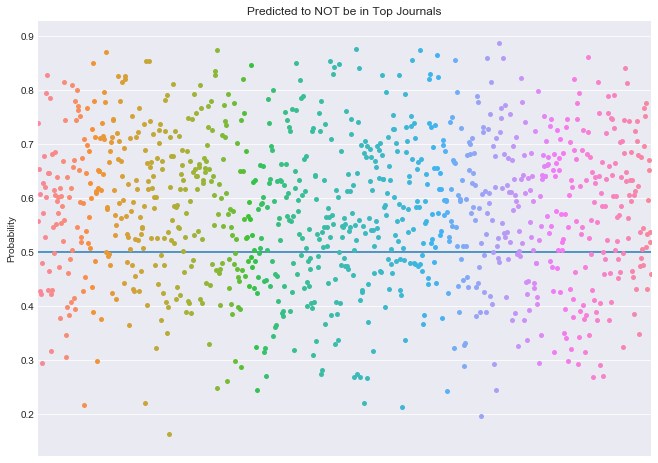

In [81]:
'''# Graphing Not top journals
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(11, 8))
ax.axhline(y=0.5)
zero_plt = sns.stripplot(x=predVAct_df[zero].index.values, y=predVAct_df[zero]["Predict_0"])
ax.set(xlabel='', ylabel='Probability')
# hide x axis
frame1 = plt.gca().axes.get_xaxis().set_visible(False)

plt.title("Predicted to NOT be in Top Journals")

plt.savefig("raw_data_econ/NotTop_econ.png")
plt.show()'''

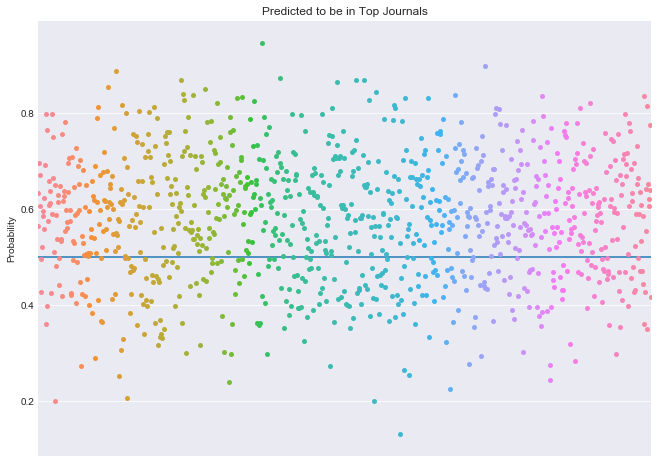

In [82]:
'''# Graphing Top journals
fig, ax = plt.subplots(figsize=(11, 8))
ax.axhline(y=0.5)
one_plt = sns.stripplot(x=predVAct_df[one].index.values, y=predVAct_df[one]["Predict_1"])
ax.set(xlabel='', ylabel='Probability')
# hide x axis
frame1 = plt.gca().axes.get_xaxis().set_visible(False)
plt.title("Predicted to be in Top Journals")

plt.savefig("raw_data_econ/Top_econ.png")
plt.show()'''

In [27]:
from sklearn.metrics import classification_report
target_names = ["Not top Journal", "Top Journal"]
report = classification_report(y_test, predictions, target_names=target_names)
print(report)

                 precision    recall  f1-score   support

Not top Journal       0.71      0.70      0.71      1016
    Top Journal       0.71      0.72      0.71      1023

    avg / total       0.71      0.71      0.71      2039



In [28]:
# Saving the model for use elsewhere
import pickle
pickle.dump(classifier,open('logReg_model', 'wb'))


In [29]:
# Test: loading in the pickled model
clf2 = pickle.load(open('logReg_model', 'rb'))

In [36]:
# Test: predict if top journal based on input string 
string = "This paper provides simple , yet robust framework evaluate time profile benefits paid unemployment spell . We derive sufficient-statistics formulae capturing marginal insurance value incentive costs unemployment benefits paid different times spell . Our approach allows us revisit separate arguments inclining declining profiles put forward theoretical literature identify welfare-improving changes benefit profile account relevant arguments jointly . For empirical implementation , use administrative data unemployment , linked data consumption , income , wealth Sweden . First , exploit duration-dependent kinks replacement rate find , anything , moral hazard cost benefits larger paid earlier spell . Second , find drop consumption affecting insurance value benefits large start spell , increases throughout spell . In trading insurance incentives , analysis suggests flat benefit profile Sweden generous overall . However , insurance incentives side , find evidence support introduction declining tilt profile ."
test = "gfhjkbhvgcgfdxtrgyuh higjgi yuiu uygf uyfiu fuiyf iu fuky fuy fufkuyfyu"
test1 = " "
def model_predict(s):
    string = []
    string.append(s)
    vectorized = hash_vectorizer.transform(string)
    probab = round(max(clf2.predict_proba(vectorized)[0])* 100, 2) 
    prediction = clf2.predict(vectorized)[0]
    if prediction == 1:
        result = "Predicted to be in the top 20 Economics journals"
    else:
        result = "Predicted to NOT be in the top 20 Economics journals"
    return result + " with a probability of " + str(probab) + "%."
model_predict(test)

'Predicted to NOT be in the top 20 Economics journals with a probability of 57.22%.'

#### Experimenting with neural network

In [7]:
'''# Test area for neural network
# first, create a normal neural network with 42 inputs, 42 hidden nodes, and 2 outputs
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential()
model.add(Dense(units=2, activation='relu', input_dim=1048576))
model.add(Dense(units=42, activation='relu'))
model.add(Dense(units=2, activation='softmax'))'''

C:\Users\K Y\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 2)                 2097154   
_________________________________________________________________
dense_2 (Dense)              (None, 42)                126       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 86        
Total params: 2,097,366
Trainable params: 2,097,366
Non-trainable params: 0
_________________________________________________________________


In [9]:
'''from keras.utils import to_categorical
y_binary = to_categorical(y_train)

model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(X_train,
    y_binary,
    epochs=20,
    shuffle=True,
    verbose=3
)'''

'''
estimated runtime = 30mins (20 epochs, 1.5mins each)
'''

Epoch 1/20
Epoch 2/20
Epoch 3/20
Epoch 4/20
Epoch 5/20
Epoch 6/20
Epoch 7/20
Epoch 8/20
Epoch 9/20
Epoch 10/20
Epoch 11/20
Epoch 12/20
Epoch 13/20
Epoch 14/20
Epoch 15/20
Epoch 16/20
Epoch 17/20
Epoch 18/20
Epoch 19/20
Epoch 20/20


In [10]:
'''y_binary_test = to_categorical(y_test) 
score = model.evaluate(X_test, y_binary_test, verbose=0)
print('Loss: ', score[0], 'Test accuracy:', score[1])'''

Loss:  0.7102314857051023 Test accuracy: 0.7099125365010736


In [ ]:
# TPOT